To be used for capstone project

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [7]:
path = "https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv"
df = pd.read_csv(path)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 0, 'bedrooms')

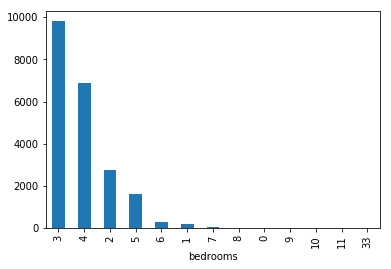

In [13]:
df["bedrooms"].value_counts().plot(kind = "bar")
plt.xlabel("price")
plt.xlabel("bedrooms")

Text(0.5, 1.0, 'Sqft vs Price')

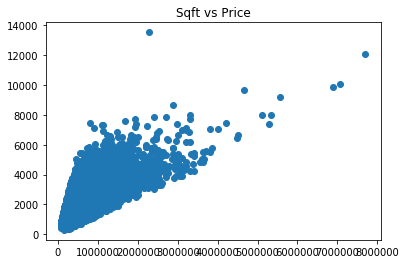

In [15]:
plt.scatter(df["price"], df["sqft_living"])
plt.title("Sqft vs Price")

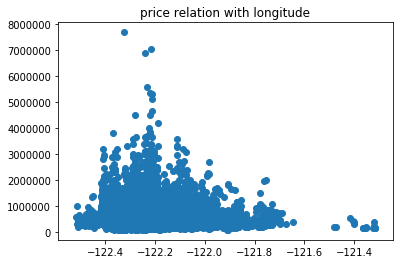

In [17]:
plt.title("price relation with longitude")
plt.scatter(df.long, df.price)

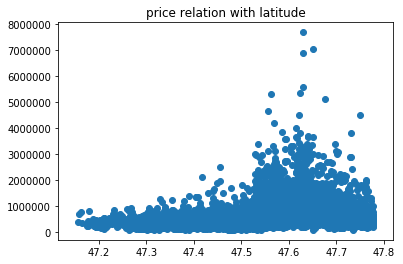

In [18]:
plt.title("price relation with latitude")
plt.scatter(df.lat, df.price)

Text(0, 0.5, 'Price')

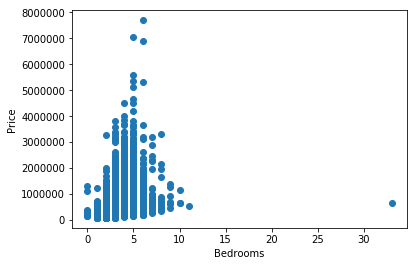

In [20]:
plt.scatter(df.bedrooms,df.price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0.5, 1.0, 'price vs presence of waterfront(0 = no waterfront)')

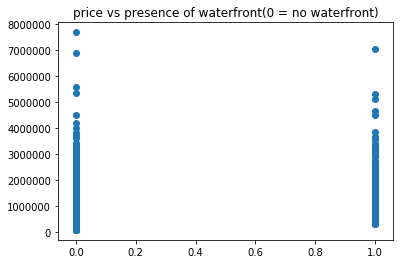

In [23]:
plt.scatter(df.waterfront, df.price)
plt.title("price vs presence of waterfront(0 = no waterfront)")

In [24]:
train = df.drop(["id","price"], axis = 1)

In [25]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


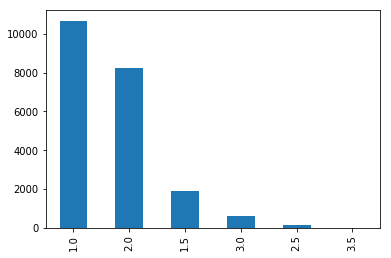

In [26]:
df.floors.value_counts().plot(kind="bar")

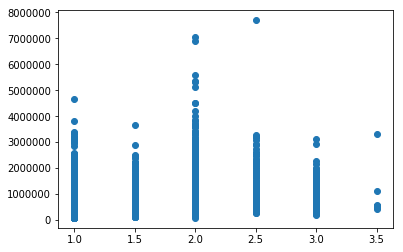

In [27]:
plt.scatter(df.floors, df.price)

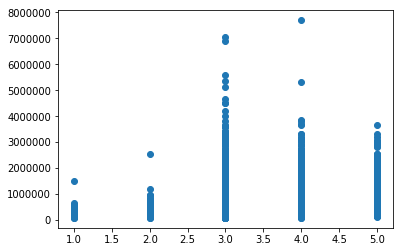

In [28]:
plt.scatter(df.condition, df.price)

Text(0.5, 1.0, 'figuring out the expensive zipcodes')

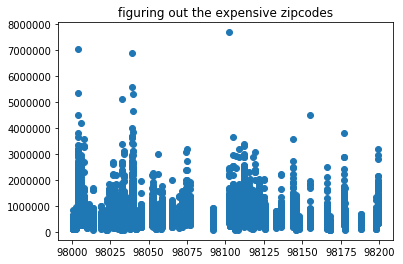

In [31]:
plt.scatter(df.zipcode, df.price)
plt.title("figuring out the expensive zipcodes")

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()

In [35]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train = df.drop(['id', 'price'],axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test , y_train , y_test = train_test_split(train , labels , test_size = 0.10,random_state =2)


In [38]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
reg.score(x_test, y_test)

0.7320342760357841

In [40]:
from sklearn.metrics import r2_score

In [41]:
y_hat = reg.predict(x_test)

In [44]:
r2_score(y_hat, y_test)

0.6172975583272575